# Compare Embedding Models

Compare and visualize results from previous benchmark experiments.

## 1. Setup

### 1.1 Install & Import

Install the necessary packages.

In [1]:
%pip install -r requirements.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import json
import os
from pathlib import Path
from functions.utils import *
from functions.visualize import *

### 1.2 Load Results

In [3]:
results_dir = Path("results")

with open(os.path.join(results_dir, "text-embedding-3-small-2025-04-17--10-56-33.json"), "r") as f:
    openai_small_results = json.load(f)

with open(os.path.join(results_dir, "text-embedding-3-large-2025-04-17--10-56-54.json"), "r") as f:
    openai_large_results = json.load(f)
    
with open(os.path.join(results_dir, "jina-embeddings-v3-2025-04-17--10-57-15.json"), "r") as f:
    jina_results = json.load(f)

In [4]:
results_list = [openai_small_results, openai_large_results, jina_results] # Add as many results as you want to compare

# Create a dataframe of the results
metrics_df = create_metrics_dataframe(results_list)

metrics_df

,Model,Recall@1,Recall@3,Recall@5,Recall@10,Precision@3,Precision@5,Precision@10,NDCG@3,NDCG@5,NDCG@10,MAP@3,MAP@5,MAP@10
0,text-embedding-3-small,0.45499,0.61557,0.68127,0.75182,0.20519,0.13625,0.07518,0.54930,0.57663,0.59929,0.52636,0.54169,0.55095
1,text-embedding-3-large,0.50852,0.66180,0.74696,0.82968,0.22060,0.14939,0.08297,0.59949,0.63457,0.66180,0.57786,0.59732,0.60885
2,jina-embeddings-v3,0.44769,0.56691,0.64234,0.71046,0.18897,0.12847,0.07105,0.51749,0.54859,0.57064,0.50041,0.51768,0.52680


## 2. Compare

<Figure size 1200x600 with 0 Axes>

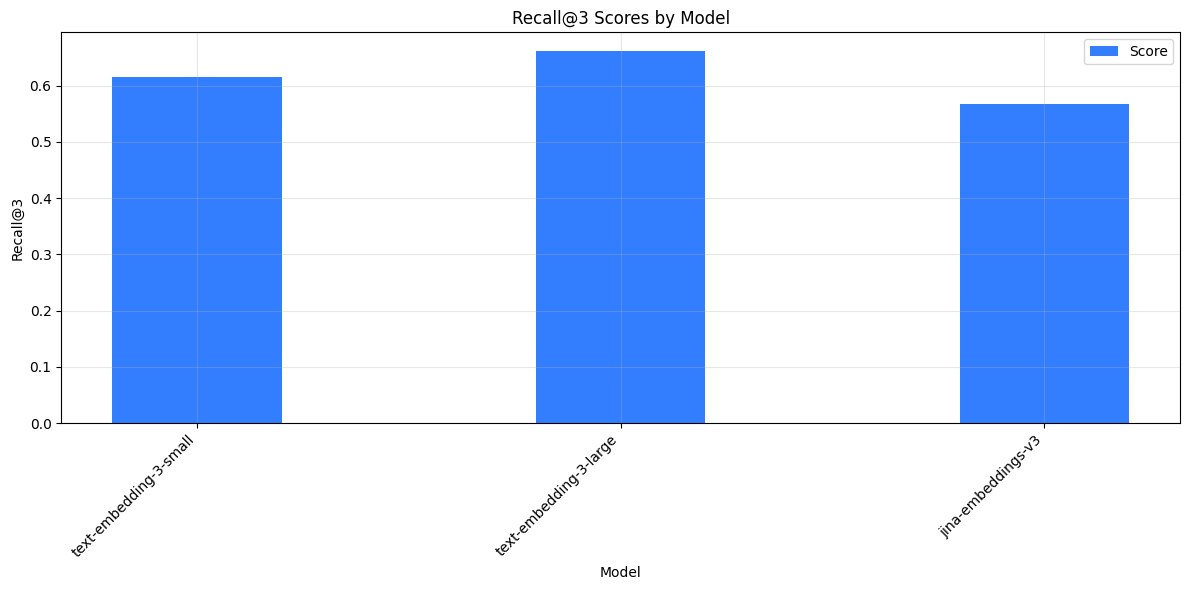

<Figure size 640x480 with 0 Axes>

In [11]:
compare_embedding_models(
    metrics_df = metrics_df,
    metric = "Recall@3",
    title = "Recall@3 Scores by Model"
)

<Figure size 1200x600 with 0 Axes>

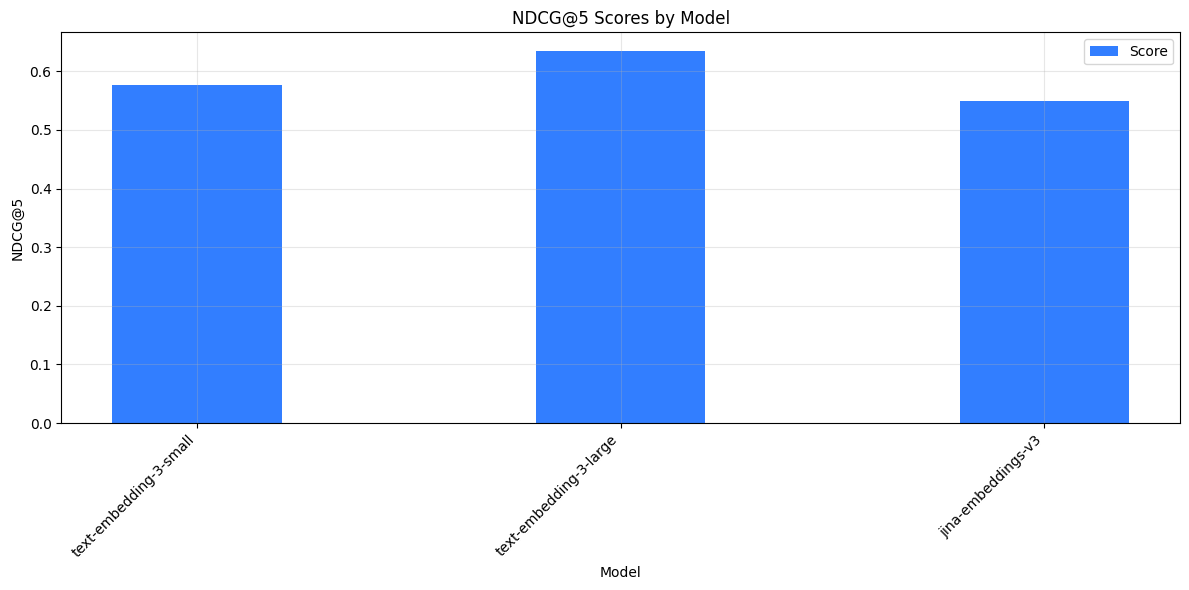

In [10]:
compare_embedding_models(
    metrics_df = metrics_df,
    metric = "NDCG@5",
    title = "NDCG@5 Scores by Model"
)

<Figure size 1200x600 with 0 Axes>

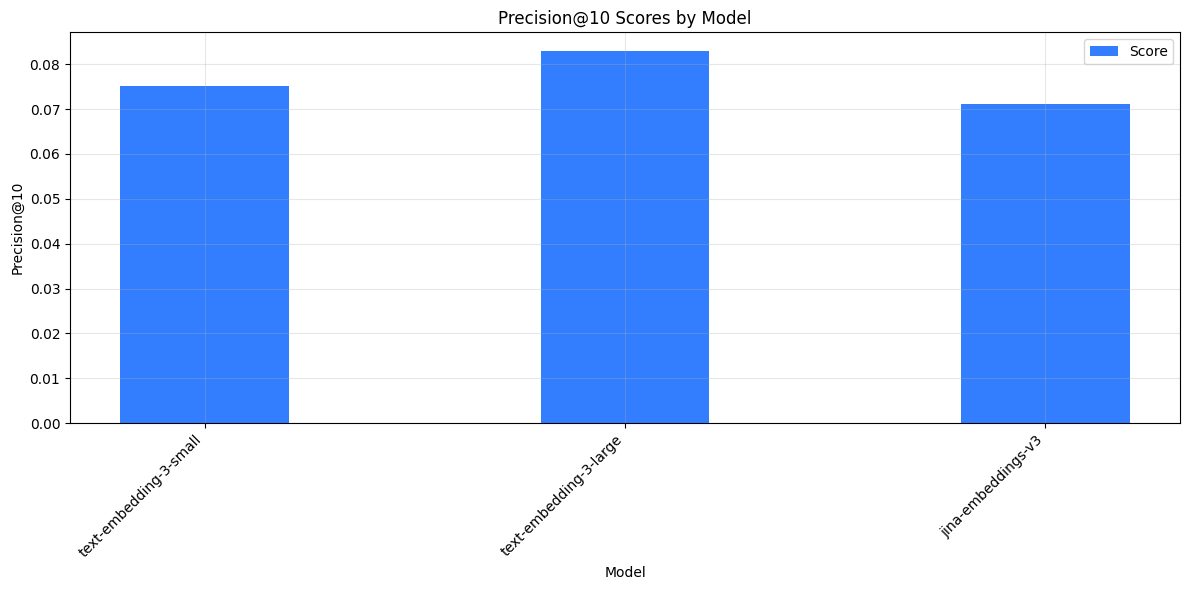

In [9]:
compare_embedding_models(
    metrics_df = metrics_df,
    metric = "Precision@10",
    title = "Precision@10 Scores by Model"
)